In [89]:
import collections
from tqdm import tqdm
import statistics
import os
import copy
import math
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
rows = []

anime_id_to_name = {}
anime_name_to_id = {}
anime_id_to_genres = {}

with open('myanimelist/anime.csv', newline='') as f:
    file_rows = csv.reader(f)
    first_row = True
    for row in file_rows:
        if first_row:
            first_row = False
        else:
            anime_id = int(row[0])
            anime_name = row[1]
            anime_genres = set()
            anime_genres_spaces = row[2].split(',')
            for genre in anime_genres_spaces:
                if not genre:
                    continue
                if genre[0] == ' ':
                    anime_genres.add(genre[1:])
                else:
                    anime_genres.add(genre)
                
            
            
            anime_id_to_name[anime_id] = anime_name
            anime_name_to_id[anime_name] = anime_id
            anime_id_to_genres[anime_id] = anime_genres   
            
anime_names = anime_name_to_id.keys()
anime_ids = anime_id_to_name.keys()

In [46]:
print(anime_id_to_name[list(anime_id_to_genres.keys())[618]],list(anime_id_to_genres.items())[618])

Zan Sayonara Zetsubou Sensei Bangaichi (7044, {'Comedy', 'Parody', 'School'})


In [4]:
all_genres_counter = collections.Counter([genre for anime_genres in anime_id_to_genres.values() for genre in anime_genres])

all_genres = set()
for s in anime_id_to_genres.values():
    all_genres |= s
    
anime_count = len(list(anime_ids))

In [5]:
print(all_genres_counter)

print()

print(all_genres)

print()

print(anime_count)

Counter({'Comedy': 4645, 'Action': 2845, 'Adventure': 2348, 'Fantasy': 2309, 'Sci-Fi': 2070, 'Drama': 2016, 'Shounen': 1711, 'Kids': 1609, 'Romance': 1464, 'School': 1220, 'Slice of Life': 1220, 'Hentai': 1141, 'Supernatural': 1037, 'Mecha': 944, 'Music': 860, 'Historical': 806, 'Magic': 778, 'Ecchi': 637, 'Shoujo': 603, 'Seinen': 547, 'Sports': 543, 'Mystery': 495, 'Super Power': 465, 'Military': 426, 'Parody': 408, 'Space': 381, 'Horror': 369, 'Harem': 317, 'Demons': 294, 'Martial Arts': 265, 'Dementia': 240, 'Psychological': 229, 'Police': 197, 'Game': 181, 'Samurai': 148, 'Vampire': 102, 'Thriller': 87, 'Cars': 72, 'Shounen Ai': 65, 'Shoujo Ai': 55, 'Josei': 54, 'Yuri': 42, 'Yaoi': 39})

{'Slice of Life', 'Military', 'Action', 'Super Power', 'Sports', 'Mystery', 'Samurai', 'Horror', 'Vampire', 'Adventure', 'Demons', 'Mecha', 'Historical', 'Police', 'Romance', 'Drama', 'Shounen', 'Cars', 'Magic', 'Space', 'Music', 'Shoujo', 'Yuri', 'Comedy', 'Harem', 'Seinen', 'Martial Arts', 'Shoun

In [6]:
def calculate_tfidf(anime):
    terms = list(anime_id_to_genres[anime])
    terms_len = len(terms)
    
    tfidfd = collections.defaultdict(lambda: 0.0)

    for genre in anime_id_to_genres[anime]:
        tfidfd[genre] = 1.0/terms_len * np.log10(anime_count/all_genres_counter[genre])

    ksum = sum(tfidfd[k] for k in tfidfd.keys())
    for k in tfidfd.keys():
        tfidfd[k] = tfidfd[k]/ksum
        
    return tfidfd

calculate_tfidf(7044)

defaultdict(<function __main__.calculate_tfidf.<locals>.<lambda>()>,
            {'Comedy': 0.145506621494283,
             'Parody': 0.5091206245854134,
             'School': 0.3453727539203035})

In [7]:
def calculate_cosine(anime1, anime2):
        
    # this is done so that a title is similar to itself even if it doesnt have any tags
    if anime1 == anime2:
        return 1
    
    anime1tfidf = calculate_tfidf(anime1)
    anime2tfidf = calculate_tfidf(anime2)
    
    licznik = 0.0
    for k in set(list(anime1tfidf.keys()) + list(anime2tfidf.keys())):
        licznik += anime1tfidf[k] * anime2tfidf[k]
    
    m1 = sum(anime1tfidf[k]**2.0 for k in anime1tfidf.keys())
    m2 = sum(anime2tfidf[k]**2.0 for k in anime2tfidf.keys())
    
    try:
        res = licznik/(math.sqrt(m1) * math.sqrt(m2))
        if not math.isnan(res):
            return res
        else:
            return -1
    except:
        return -1

In [8]:
atmp = []
for anime in anime_ids:
    atmp.append(( 
        calculate_cosine(
            anime, 
            6675
        ), anime,anime_id_to_name[anime],anime_id_to_genres[anime])
    )
    
for e in sorted(atmp, reverse=True):
    print(e)

<ipython-input-7-9aaea3070c22>:18: RuntimeWarning: invalid value encountered in double_scalars
  res = licznik/(math.sqrt(m1) * math.sqrt(m2))


(1, 6675, 'Redline', {'Cars', 'Action', 'Sci-Fi', 'Sports'})
(0.9337097588024856, 11483, 'Redline Pilot', {'Cars', 'Sports'})
(0.9156056881079427, 10562, 'Machine Hayabusa', {'Sports', 'Cars', 'Action', 'Shounen'})
(0.8941622712299346, 3800, 'Arrow Emblem Grand Prix no Taka', {'Sports', 'Cars', 'Drama'})
(0.8872122881978289, 20115, 'Gekisou! Rubenkaiser', {'Sports', 'Cars', 'Shounen'})
(0.8872122881978289, 7048, 'Crush Gear Nitro', {'Sports', 'Cars', 'Shounen'})
(0.8872122881978289, 6055, 'F', {'Sports', 'Cars', 'Shounen'})
(0.8872122881978289, 3808, 'Futari Daka', {'Sports', 'Cars', 'Shounen'})
(0.8872122881978289, 2709, 'Bakusou Kyoudai Let&#039;s &amp; Go MAX', {'Sports', 'Cars', 'Shounen'})
(0.8872122881978289, 2706, 'Bakusou Kyoudai Let&#039;s &amp; Go WGP', {'Sports', 'Cars', 'Shounen'})
(0.8872122881978289, 388, 'Capeta', {'Sports', 'Cars', 'Shounen'})
(0.8748175390243395, 16331, 'Next A-Class', {'Cars', 'Action', 'Sci-Fi'})
(0.8748175390243395, 9881, 'Chou Supercar Gattiger', {

(0.09796973149661761, 5250, 'God Mazinger', {'Fantasy', 'Action', 'Mecha'})
(0.09796973149661761, 1947, 'Kikou Sennyo Rouran', {'Fantasy', 'Action', 'Mecha'})
(0.09779834913400734, 34136, 'Orange: Mirai', {'Romance', 'School', 'Drama', 'Sci-Fi', 'Shoujo'})
(0.09779834913400734, 32729, 'Orange', {'Romance', 'School', 'Drama', 'Sci-Fi', 'Shoujo'})
(0.09779343744066493, 28683, 'One Piece: Episode of Alabasta - Prologue', {'Fantasy', 'Adventure', 'Action', 'Shounen'})
(0.09779343744066493, 18331, 'Meoteoldosawa 108 Yogoe', {'Fantasy', 'Adventure', 'Action', 'Shounen'})
(0.09779343744066493, 17699, 'Toriko Movie: Bishokushin no Special Menu', {'Fantasy', 'Adventure', 'Action', 'Shounen'})
(0.09779343744066493, 12929, 'Saint Seiya Omega', {'Fantasy', 'Adventure', 'Action', 'Shounen'})
(0.09779343744066493, 9106, 'Nogsaegjeoncha Haemosu', {'Fantasy', 'Adventure', 'Action', 'Shounen'})
(0.09779343744066493, 2819, 'Dragon Quest: Abel Yuusha Densetsu', {'Fantasy', 'Adventure', 'Action', 'Shounen

(0.0, 29933, 'MTV Japan Station ID', {'Music'})
(0.0, 29932, 'Yume', {'Dementia'})
(0.0, 29929, 'Tsuru no Ongaeshi', {'Kids'})
(0.0, 29928, 'Jataka Monogatari: Kiniro no Shika', {'Kids'})
(0.0, 29927, 'Kaguya-hime', {'Kids', 'Historical'})
(0.0, 29926, 'Inaka Nezumi to Machi Nezumi', {'Kids'})
(0.0, 29925, 'Poron Guitar', {'Kids'})
(0.0, 29924, 'Goman-hiki', {'Kids'})
(0.0, 29919, 'Fushigi na Taiko', {'Kids'})
(0.0, 29918, 'Go-hiki no Kozaru-tachi', {'Demons'})
(0.0, 29917, 'Uriko-hime to Amanojaku', {'Demons'})
(0.0, 29916, 'Kedamono-tachi no Sumu Ie de', {'Hentai'})
(0.0, 29915, 'Junai Maniac', {'Hentai'})
(0.0, 29908, 'Kodomo no Kaitei no Koto', {'Psychological'})
(0.0, 29907, 'Fue', {'Dementia'})
(0.0, 29906, 'Kakari', {'Psychological'})
(0.0, 29905, 'Yasashii Fue, Tori, Ishi', {'Dementia'})
(0.0, 29904, 'Yellow', {'Psychological'})
(0.0, 29902, 'A Play', {'Music'})
(0.0, 29901, 'Sore Ike! Anpanman: Mija to Mahou no Lamp', {'Comedy', 'Kids', 'Fantasy'})
(0.0, 29900, 'Nobara', {'Dra

(0.0, 10850, 'Seibu Tetsudou Ekiin Tako-chan', {'Comedy', 'Police', 'Parody', 'Slice of Life'})
(0.0, 10849, 'Shinryaku! Ika Musume: Ika Ice Tabena-ika?', {'Music'})
(0.0, 10847, 'Inumarudashi', {'Comedy'})
(0.0, 10842, 'Fullmetal Alchemist: The Sacred Star of Milos Specials', {'Comedy', 'Magic', 'Fantasy'})
(0.0, 10838, 'Double-J', {'Comedy', 'Shounen', 'School'})
(0.0, 10834, 'Baka to Test to Shoukanjuu: Spinout! Sore ga Bokura no Nichijou', {'Comedy', 'Super Power', 'Romance', 'School'})
(0.0, 10832, 'Ikoku Meiro no Croisée: Yune &amp; Alice', {'Seinen', 'Historical', 'Slice of Life'})
(0.0, 10827, 'Wizard Girl Ambitious', {'Fantasy', 'Hentai'})
(0.0, 10825, 'Ranma ½: Battle ga Ippai 29-nin no Korinai Yatsura', {'Comedy', 'Martial Arts', 'Slice of Life'})
(0.0, 10824, 'Ranma ½: DoCo Music Video', {'Comedy', 'Music', 'Martial Arts', 'Slice of Life'})
(0.0, 10823, 'Ranma ½: 1994 Music Calendar', {'Comedy', 'Martial Arts', 'Slice of Life'})
(0.0, 10822, 'Ranma ½: Totteoki Talk Best of 

(0.0, 1689, 'Byousoku 5 Centimeter', {'Romance', 'Slice of Life', 'Drama'})
(0.0, 1688, 'Nanatsu-iro★Drops', {'Magic', 'Romance', 'School'})
(0.0, 1684, 'Dotto Koni-chan', {'Comedy'})
(0.0, 1679, 'Green Green Specials', {'Comedy', 'Romance', 'Slice of Life', 'Ecchi'})
(0.0, 1663, 'Haha wo Tazunete Sanzenri', {'Adventure', 'Historical', 'Slice of Life', 'Drama'})
(0.0, 1659, 'Mai-Otome Specials', {'Comedy', 'Magic', 'Fantasy', 'Drama'})
(0.0, 1657, 'Byston Well Monogatari: Garzey no Tsubasa', {'Fantasy'})
(0.0, 1656, 'PostPet Momobin', {'Comedy', 'Kids'})
(0.0, 1655, 'Nerima Daikon Brothers', {'Comedy', 'Music'})
(0.0, 1654, 'Kashimashi: Girl Meets Girl OVA', {'Comedy', 'Romance', 'Slice of Life', 'School', 'Drama', 'Shoujo Ai'})
(0.0, 1644, 'Princess Rouge', {'Fantasy', 'Romance'})
(0.0, 1642, 'Sugar Sugar Rune', {'Fantasy', 'Magic', 'Shoujo'})
(0.0, 1639, 'Boku no Pico', {'Yaoi', 'Hentai'})
(0.0, 1638, 'Peter Pan no Bouken', {'Fantasy', 'Adventure'})
(0.0, 1637, 'Kaze to Ki no Uta San

In [9]:
# idk if it makes sens to have this function, 
# we could maybe merge functions i.e calculate_cosine from here and danbooru notebook
def calculate_series_similarity(series1, series2):
    return calculate_cosine(series1, series2)

In [10]:
# example
series1 = anime_name_to_id['Kimi no Na wa.']
atmp = []
for series2 in tqdm(anime_ids):
    a = calculate_series_similarity(series1, series2)
    atmp.append((a, series2))
    
for w in sorted(atmp, reverse=True):
    print(w)

  0%|          | 0/12294 [00:00<?, ?it/s]<ipython-input-7-9aaea3070c22>:18: RuntimeWarning: invalid value encountered in double_scalars
  res = licznik/(math.sqrt(m1) * math.sqrt(m2))
100%|██████████| 12294/12294 [00:00<00:00, 36629.89it/s]


(1.0000000000000002, 547)
(1.0000000000000002, 546)
(1, 32281)
(0.9762646819216453, 14669)
(0.8920885169212824, 6572)
(0.8920885169212824, 2787)
(0.8920885169212824, 355)
(0.8852788284868802, 32262)
(0.8852788284868802, 26019)
(0.8745052988110293, 20903)
(0.8745052988110293, 10067)
(0.8682551245974518, 20517)
(0.8682551245974518, 18195)
(0.8682551245974518, 16001)
(0.8682551245974518, 11887)
(0.8682551245974518, 2167)
(0.8501304920850693, 2105)
(0.8501304920850693, 1607)
(0.8501304920850693, 1039)
(0.8501304920850693, 713)
(0.8340786765995449, 31716)
(0.8260378704157191, 28725)
(0.8260378704157191, 18053)
(0.8260378704157191, 18045)
(0.8260378704157191, 17585)
(0.8260378704157191, 12175)
(0.8260378704157191, 9988)
(0.8260378704157191, 8481)
(0.8260378704157191, 6351)
(0.8260378704157191, 2927)
(0.8260378704157191, 2926)
(0.8260378704157191, 2179)
(0.8260378704157191, 2129)
(0.8260378704157191, 1624)
(0.8260378704157191, 756)
(0.7983132125787216, 34106)
(0.7983132125787216, 31610)
(0.79

(0.22172614858236436, 32174)
(0.22172614858236436, 30344)
(0.22172614858236436, 23587)
(0.22172614858236436, 17437)
(0.22172614858236436, 14835)
(0.22172614858236436, 11889)
(0.22172614858236436, 10278)
(0.22172614858236436, 4033)
(0.2213913695608731, 2019)
(0.2213913695608731, 1660)
(0.2213913695608731, 1287)
(0.22118285290175785, 25087)
(0.22118285290175785, 25071)
(0.22118285290175785, 23585)
(0.22118285290175785, 2831)
(0.22118285290175785, 2830)
(0.22118285290175785, 2573)
(0.22091158953617368, 1765)
(0.2208485811794747, 33889)
(0.2208485811794747, 6152)
(0.2208485811794747, 856)
(0.2207646930822443, 8889)
(0.22064159300143554, 2751)
(0.22064159300143554, 2133)
(0.22047645773667826, 113)
(0.22042463867491663, 1337)
(0.2204136378404929, 31050)
(0.2201547040761592, 16508)
(0.2201547040761592, 14889)
(0.2201547040761592, 14073)
(0.22009196035015244, 33378)
(0.22009196035015244, 16866)
(0.21983264128178362, 1451)
(0.21951251804677213, 1907)
(0.21944684496945785, 9130)
(0.2194468449694

(0.0, 29397)
(0.0, 29395)
(0.0, 29393)
(0.0, 29391)
(0.0, 29389)
(0.0, 29387)
(0.0, 29385)
(0.0, 29383)
(0.0, 29381)
(0.0, 29379)
(0.0, 29377)
(0.0, 29375)
(0.0, 29373)
(0.0, 29371)
(0.0, 29369)
(0.0, 29367)
(0.0, 29361)
(0.0, 29359)
(0.0, 29355)
(0.0, 29353)
(0.0, 29351)
(0.0, 29349)
(0.0, 29347)
(0.0, 29325)
(0.0, 29323)
(0.0, 29311)
(0.0, 29293)
(0.0, 29291)
(0.0, 29283)
(0.0, 29275)
(0.0, 29273)
(0.0, 29271)
(0.0, 29269)
(0.0, 29267)
(0.0, 29261)
(0.0, 29255)
(0.0, 29249)
(0.0, 29247)
(0.0, 29235)
(0.0, 29233)
(0.0, 29231)
(0.0, 29223)
(0.0, 29209)
(0.0, 29181)
(0.0, 29179)
(0.0, 29177)
(0.0, 29173)
(0.0, 29165)
(0.0, 29163)
(0.0, 29153)
(0.0, 29151)
(0.0, 29141)
(0.0, 29135)
(0.0, 29133)
(0.0, 29123)
(0.0, 29111)
(0.0, 29107)
(0.0, 29105)
(0.0, 29103)
(0.0, 29101)
(0.0, 29085)
(0.0, 29083)
(0.0, 29073)
(0.0, 29067)
(0.0, 29053)
(0.0, 29035)
(0.0, 29017)
(0.0, 29003)
(0.0, 28993)
(0.0, 28991)
(0.0, 28989)
(0.0, 28983)
(0.0, 28981)
(0.0, 28977)
(0.0, 28965)
(0.0, 28961)
(0.0, 28953)

(0.0, 9325)
(0.0, 9324)
(0.0, 9322)
(0.0, 9318)
(0.0, 9317)
(0.0, 9316)
(0.0, 9314)
(0.0, 9312)
(0.0, 9311)
(0.0, 9310)
(0.0, 9309)
(0.0, 9308)
(0.0, 9304)
(0.0, 9303)
(0.0, 9292)
(0.0, 9291)
(0.0, 9288)
(0.0, 9284)
(0.0, 9282)
(0.0, 9274)
(0.0, 9270)
(0.0, 9257)
(0.0, 9253)
(0.0, 9252)
(0.0, 9241)
(0.0, 9239)
(0.0, 9232)
(0.0, 9221)
(0.0, 9211)
(0.0, 9205)
(0.0, 9204)
(0.0, 9203)
(0.0, 9201)
(0.0, 9200)
(0.0, 9177)
(0.0, 9175)
(0.0, 9172)
(0.0, 9170)
(0.0, 9167)
(0.0, 9154)
(0.0, 9124)
(0.0, 9121)
(0.0, 9119)
(0.0, 9107)
(0.0, 9106)
(0.0, 9100)
(0.0, 9098)
(0.0, 9095)
(0.0, 9091)
(0.0, 9087)
(0.0, 9070)
(0.0, 9063)
(0.0, 9061)
(0.0, 9056)
(0.0, 9053)
(0.0, 9047)
(0.0, 9045)
(0.0, 9043)
(0.0, 9041)
(0.0, 9040)
(0.0, 9035)
(0.0, 9032)
(0.0, 9028)
(0.0, 9023)
(0.0, 9015)
(0.0, 9013)
(0.0, 9009)
(0.0, 9008)
(0.0, 9007)
(0.0, 9006)
(0.0, 9002)
(0.0, 9001)
(0.0, 8999)
(0.0, 8995)
(0.0, 8987)
(0.0, 8985)
(0.0, 8972)
(0.0, 8968)
(0.0, 8966)
(0.0, 8965)
(0.0, 8964)
(0.0, 8963)
(0.0, 8961)
(0.0

(0.0, 1389)
(0.0, 1388)
(0.0, 1387)
(0.0, 1386)
(0.0, 1385)
(0.0, 1378)
(0.0, 1376)
(0.0, 1374)
(0.0, 1372)
(0.0, 1370)
(0.0, 1369)
(0.0, 1368)
(0.0, 1367)
(0.0, 1366)
(0.0, 1365)
(0.0, 1364)
(0.0, 1363)
(0.0, 1362)
(0.0, 1361)
(0.0, 1360)
(0.0, 1359)
(0.0, 1358)
(0.0, 1357)
(0.0, 1355)
(0.0, 1353)
(0.0, 1352)
(0.0, 1351)
(0.0, 1350)
(0.0, 1349)
(0.0, 1348)
(0.0, 1347)
(0.0, 1346)
(0.0, 1345)
(0.0, 1339)
(0.0, 1338)
(0.0, 1335)
(0.0, 1333)
(0.0, 1332)
(0.0, 1317)
(0.0, 1314)
(0.0, 1312)
(0.0, 1300)
(0.0, 1299)
(0.0, 1298)
(0.0, 1297)
(0.0, 1296)
(0.0, 1292)
(0.0, 1290)
(0.0, 1289)
(0.0, 1288)
(0.0, 1286)
(0.0, 1285)
(0.0, 1284)
(0.0, 1283)
(0.0, 1279)
(0.0, 1274)
(0.0, 1273)
(0.0, 1272)
(0.0, 1271)
(0.0, 1270)
(0.0, 1269)
(0.0, 1267)
(0.0, 1266)
(0.0, 1265)
(0.0, 1264)
(0.0, 1262)
(0.0, 1261)
(0.0, 1260)
(0.0, 1259)
(0.0, 1258)
(0.0, 1257)
(0.0, 1256)
(0.0, 1255)
(0.0, 1254)
(0.0, 1253)
(0.0, 1249)
(0.0, 1247)
(0.0, 1238)
(0.0, 1237)
(0.0, 1236)
(0.0, 1232)
(0.0, 1231)
(0.0, 1223)
(0.0

In [11]:
# this is being calculated suspiciously fast but okay, we only have at max a few genres per series
#for series1 in tqdm(anime_ids):
#    for series2 in anime_ids:
#        a = calculate_series_similarity(series1, series2)

In [60]:
ratings = collections.defaultdict(lambda: {})
user_ids = set()

with open('rating.csv','r') as f:
    lines = f.read().splitlines()
    lines = lines[1:]
    for line in lines:
        line = line.split(',')
        user_id = int(line[0])
        anime_id = int(line[1])
        if anime_id not in anime_ids:
            continue
        rating = int(line[2])
        ratings[user_id][anime_id] = rating
        user_ids.add(user_id)

In [99]:
def knn(user_id, anime_id, K):
    result = []
    
    for other_anime_id in ratings[user_id].keys():
        if other_anime_id != anime_id and ratings[user_id][other_anime_id] != -1:
            result.append((calculate_series_similarity(anime_id,other_anime_id),other_anime_id,ratings[user_id][other_anime_id]))
        
    result = sorted(result, reverse=True)
    
    K = min(K, len(result))
    
    return result[0:K]

In [79]:
def get_rating(user_id,anime_id,K):
    neighbors = knn(user_id,anime_id,K)
    
    if not neighbors:
        return 5
    
    rating = 0
    for neighbor in neighbors:
        rating += neighbor[2]
        
    return rating / len(neighbors)

In [80]:
def get_tests(path):
    tests = []
    with open(path,'r') as f:
        lines = f.read().splitlines()
        for line in lines:
            line = line.split(' ')
            user_id = int(line[0])
            anime_id = int(line[1])
            if anime_id not in anime_ids:
                continue

            tests.append((user_id,anime_id))
    return tests

In [102]:
def tester(test_user_ids,K):
    mse = 0
    n = 0
    for test in tests:
        user_id = test[0]
        tested_anime_id = test[1]
        rating = ratings[user_id][tested_anime_id]
        predicted_rating = get_rating(user_id,tested_anime_id,K)
        n += 1
        mse += (rating - predicted_rating)**2
    
    return mse / n

100%|██████████| 200/200 [00:07<00:00, 25.34it/s]


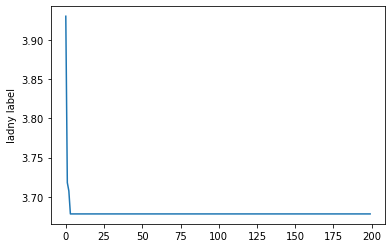

In [107]:
#paths = ['connoisseur.txt','newbies.txt','popular.txt','random.txt']
paths = ['newbies.txt']
results = []

for path in paths:
    for k in tqdm(range(200)):
        tests = get_tests(path)
        mse = tester(tests,k+1) 
        results.append(mse)
        #print(f'MSE for {path} is {mse}')
        
        
plt.plot(results)
plt.ylabel('ladny label')
plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]<ipython-input-7-9aaea3070c22>:18: RuntimeWarning: invalid value encountered in double_scalars
  res = licznik/(math.sqrt(m1) * math.sqrt(m2))
100%|██████████| 200/200 [29:55<00:00,  8.98s/it]


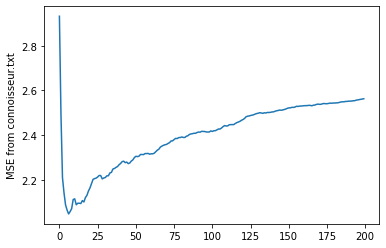

100%|██████████| 200/200 [00:07<00:00, 27.11it/s]


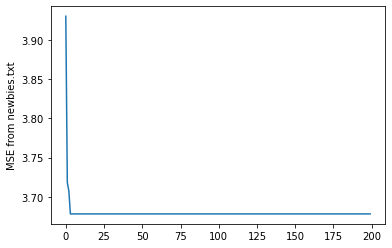

100%|██████████| 200/200 [08:30<00:00,  2.55s/it]


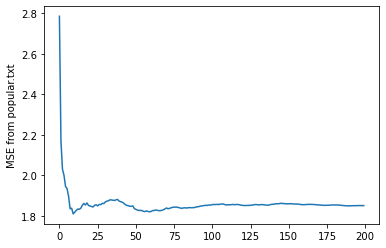

100%|██████████| 200/200 [12:24<00:00,  3.72s/it]


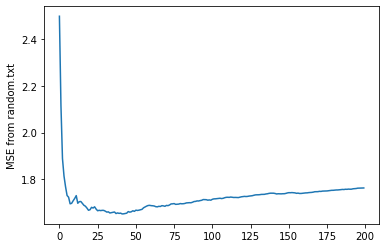

In [110]:
paths = ['connoisseur.txt','newbies.txt','popular.txt','random.txt']
for path in paths:
    res = []
    for k in tqdm(range(200)):
        tests = get_tests(path)
        mse = tester(tests,k+1) 
        res.append(mse)
    plt.plot(res)
    plt.ylabel(f'MSE from {path}')
    plt.show()
    with open(f'{path}.out','w') as f:
        for mse in res:
            f.write(str(mse) + '\n')



In [106]:
min(results)

1.6522564161859936